# US House Price Prediction using Linear Regrssion

## Importing Main Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


## Lodaing the dataset

In [2]:
df=pd.read_csv("USA_Housing.csv")

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
# Showing the first Five rows of the data:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
# Showing the last Five rows of the data:
df.tail()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316
4999,65510.581804,5.992305,6.792336,4.07,46501.283803,1.298950e+06,"37778 George Ridges Apt. 509\nEast Holly, NV 2..."


In [6]:
# Showing the no of rows in columns by using len function:
len(df)

5000

## Clean data - Feature Engineering

In [7]:
# Showing the columns name by using columns attributes
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [8]:
# Need columns names in singel column:
for i in df.columns:
    print(i)

Avg. Area Income
Avg. Area House Age
Avg. Area Number of Rooms
Avg. Area Number of Bedrooms
Area Population
Price
Address


In [9]:
# columns rename requid 
df.columns=["Income","House_Age","Rooms","Bedrooms","Population","Price","Address"]

In [10]:
df

,Income,House_Age,Rooms,Bedrooms,Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [11]:
df.columns

Index(['Income', 'House_Age', 'Rooms', 'Bedrooms', 'Population', 'Price',
       'Address'],
      dtype='object')

In [12]:
for i in df.columns:
    print(i)

Income
House_Age
Rooms
Bedrooms
Population
Price
Address


In [13]:
# In our data frame Address columns not useable so we can remove the columns by using drop method

df.drop(["Address"],axis=1,inplace=True)

# axis = 1 because of its by default axis=0 . axis  = 0 means row wise , axis = 1 means column wise 
# so here we want to remove a column so we use axis = 1 .

# inplace = True . mean we want this changing in our main dataset.

In [14]:
df

,Income,House_Age,Rooms,Bedrooms,Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [15]:
# we can check our data info by using info() method:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Income      5000 non-null   float64
 1   House_Age   5000 non-null   float64
 2   Rooms       5000 non-null   float64
 3   Bedrooms    5000 non-null   float64
 4   Population  5000 non-null   float64
 5   Price       5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


## Exploratory data analysis

In [16]:
# showing total no of rows and column in datafram:
df.shape

(5000, 6)

In [17]:
# Showing total no of rows
df.shape[0]

5000

In [18]:
# Showing total no of columns
df.shape[1]

6

In [19]:
# Total no of element in dataframe
df.size

30000

In [20]:
# checking data frame columns wise:
df.dtypes

Income        float64
House_Age     float64
Rooms         float64
Bedrooms      float64
Population    float64
Price         float64
dtype: object

In [21]:
# Checking missing values in Dataframe
df.isna().sum()

Income        0
House_Age     0
Rooms         0
Bedrooms      0
Population    0
Price         0
dtype: int64

In [22]:
# showing columns wise count of elements
df.count()

Income        5000
House_Age     5000
Rooms         5000
Bedrooms      5000
Population    5000
Price         5000
dtype: int64

In [23]:
# we can describe our data by using describe() function

df.describe()

# using this function we can simply find [count,mean,std,min,25%,50%,75%,max]

,Income,House_Age,Rooms,Bedrooms,Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [24]:
df.corr()

# dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. 
# Any na values are automatically excluded. For any non-numeric data type columns in the dataframe 
# it is ignored.

,Income,House_Age,Rooms,Bedrooms,Population,Price
Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
House_Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


## Data Visualization

##### Now we can find correlations between X and y variabls .
##### In X variabls we have independent variables(Features) and in y variable we have dependent variables (Target).
##### We can change this corr table into a graph usng seaborn heatmap through for simply understanding.

<Axes: >

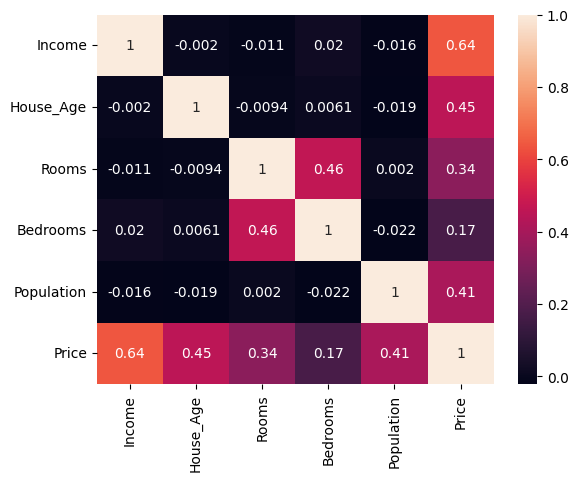

In [25]:
sns.heatmap(df.corr(),annot=True)

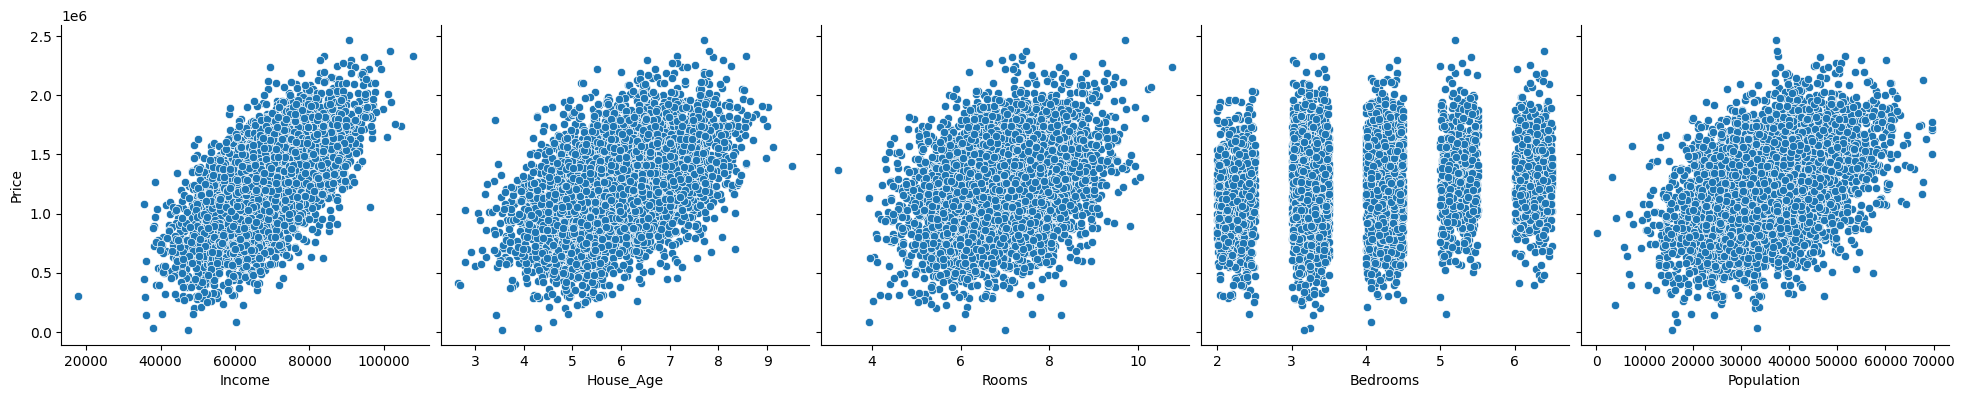

In [26]:
# Let's see how price are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['Income', 'House_Age', 'Rooms',"Bedrooms","Population"], y_vars='Price', height=4, aspect=1, kind='scatter')
plt.show()

# Creating a Linear Regression Model

### Data Prepration

In [27]:
X=df.drop("Price",axis=1)
y=df["Price"]

In [28]:
X

,Income,House_Age,Rooms,Bedrooms,Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [29]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

### Splitting the data

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

### Model Creation

In [31]:
model=LinearRegression()

### Model Training

In [32]:
model.fit(X_train,y_train)

LinearRegression()

### Model Prediction

In [33]:
y_prd=model.predict(X_test)

In [34]:
y_prd[:10]

array([ 969608.34680646,  953868.15548665,  907506.32836077,
        493325.26032273,  718221.21011518, 1047741.31147488,
        714277.13835133,  789465.46064127, 1801537.10306211,
       1538689.91165473])

In [35]:
# predict the price([[Income,House_Age,Rooms,Bedrooms,Population]])
model.predict([[70000,7,4,2,25555]])

array([906637.67664542])

## Find Model Acuracy : Evaluating the performance

### First we can compair y_predict and y_test

In [36]:
# y_predict
y_prd[:10]

array([ 969608.34680646,  953868.15548665,  907506.32836077,
        493325.26032273,  718221.21011518, 1047741.31147488,
        714277.13835133,  789465.46064127, 1801537.10306211,
       1538689.91165473])

In [37]:
# y_test 
y_test[:10]

398     8.942511e+05
3833    9.329794e+05
4836    9.207479e+05
4572    6.918549e+05
636     7.327332e+05
2545    9.452522e+05
1161    6.244828e+05
2230    8.495661e+05
148     1.544380e+06
2530    1.535262e+06
Name: Price, dtype: float64

In [38]:
from sklearn import metrics
# we can use this for find evaluating the performance

In [39]:
metrics.mean_absolute_error(y_test,y_prd)

81563.1473399373

In [40]:
from sklearn.metrics import mean_squared_error

In [41]:
np.sqrt(mean_squared_error(y_test, y_prd))

101672.69952286527

In [42]:
from sklearn.metrics import r2_score

In [43]:
r_squared = r2_score(y_test, y_prd)
r_squared

0.9200757649412117